In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics 

In [2]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [3]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()
data_dem2 = pd.read_excel('data/demog.xlsx')

In [4]:
state = 'US'

In [5]:
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
data_dem

(23533718.75,
 32947206.25,
 18826975,
 127653910.526316,
 63503489.4736842,
 52784300)

In [6]:
N = np.sum(data_dem)
N

319249600.0000002

In [7]:
#LOAD VACC DATA
y = state

vac8 = pd.read_csv('Script/vacc_data_new_RSV/vac_'+ y + '.csv') 
vacAB = pd.read_csv('Script/vacc_R4_AB/vac_'+ y + '_AB.csv')
vacCD = pd.read_csv('Script/vacc_R4_CD/vac_'+ y + '_CD.csv')
vacEF = pd.read_csv('Script/vacc_R4_EF/vac_'+ y + '_EF.csv')



In [89]:
pop = data_dem
vacc_AB = np.zeros([6, 800])
vacc_CD = np.zeros([6, 800])
vacc_EF = np.zeros([6, 800])
vacc_28 = np.zeros([6, 800])
###########


vacc_28[0,0:590] = vac8['0_4'].to_numpy()
vacc_28[1,0:590] = vac8['5_12'].to_numpy()
vacc_28[2,0:590] = vac8['13_17'].to_numpy() 
vacc_28[3,0:590] = vac8['18_49'].to_numpy()
vacc_28[4,0:590] = vac8['50_64'].to_numpy()
vacc_28[5,0:590] = vac8['65+'].to_numpy()

##########
vacc_AB[0,0:620] = vacAB['0_4'].to_numpy()
vacc_AB[1,0:620] = vacAB['5_12'].to_numpy()
vacc_AB[2,0:620] = vacAB['13_17'].to_numpy() 
vacc_AB[3,0:620] = vacAB['18_49'].to_numpy()
vacc_AB[4,0:620] = vacAB['50_64'].to_numpy()
vacc_AB[5,0:620] = vacAB['65+'].to_numpy()
##############
vacc_CD[0,0:620] = vacCD['0_4'].to_numpy()
vacc_CD[1,0:620] = vacCD['5_12'].to_numpy()
vacc_CD[2,0:620] = vacCD['13_17'].to_numpy() 
vacc_CD[3,0:620] = vacCD['18_49'].to_numpy()
vacc_CD[4,0:620] = vacCD['50_64'].to_numpy()
vacc_CD[5,0:620] = vacCD['65+'].to_numpy()
###########
vacc_EF[0,0:620] = vacEF['0_4'].to_numpy()
vacc_EF[1,0:620] = vacEF['5_12'].to_numpy()
vacc_EF[2,0:620] = vacEF['13_17'].to_numpy() 
vacc_EF[3,0:620] = vacEF['18_49'].to_numpy()
vacc_EF[4,0:620] = vacEF['50_64'].to_numpy()
vacc_EF[5,0:620] = vacEF['65+'].to_numpy()
###########


In [91]:
def cum_to_active(Ic): # cumulative to active 
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [92]:
def computerate(i, CWW, aW, I, Ni):  # updated rates by calling CM and interations
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [93]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [94]:
US2 = pd.read_csv('Script/fit_data_fluRSV/' + y + '.csv') 

In [95]:
hosps = US2['hosp'].to_numpy() 
print(len(hosps))

hosp_avg = np.zeros([329, ])
for i in range(329):
    hosp_avg[i] = np.mean(hosps[i:i+7])   

336


In [96]:
USdeath=pd.read_csv('death_data_us.csv')
death_count=USdeath['death'].to_numpy()
death_avg = death_count[0:329]
print(len(death_avg))

329


In [97]:
CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [98]:
cal = pd.read_csv('data/calend_new.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [99]:
Seed = np.zeros([700, 1])  

In [100]:
def get_sero(state, df2, age):
    df = df2[df2['state'] == state]
    a = df[age]
    if df.size == 0:
        return float('nan')
    else:
        return a.squeeze()

In [101]:
def set_imm(val): 
    for i in range(1000):
        fac = 1+ i*0.01
        MM_0 = [fac*0.13, fac*0.04,fac*0.04, fac*0.054, fac*0.13, fac*0.316]
        xx = np.sum(np.array(data_dem)*np.array(MM_0))/N
        if (xx >=  val):
            break
    return MM_0

In [102]:
M3_0 = set_imm(0.05)
M3_0

[0.13, 0.04, 0.04, 0.054, 0.13, 0.316]

In [103]:
facc = 0.144
IHR = [facc*0.25, facc*0.06,facc*0.017, facc*0.025, facc*0.07, facc*0.45]
IRec = [1- facc*0.25, 1- facc*0.06, 1-facc*0.017, 1-facc*0.025, 1-facc*0.07, 1-facc*0.45]

np.sum(np.array(data_dem)*np.array(IHR))/N

0.01784828567863349

In [104]:
faccc = 0.635
HDR = [faccc*0.13, faccc*0.04,faccc*0.04, faccc*0.054, faccc*0.13, faccc*0.316]
HDRec = [1- faccc*0.13, 1- faccc*0.04, 1-faccc*0.04, 1-faccc*0.054, 1-faccc*0.13, 1-faccc*0.316]

np.sum(np.array(data_dem)*np.array(HDR))/N

0.07351281245947526

In [105]:
vacc_cov = pd.read_csv('cumulative_dose.csv') # This csv file is same as the cumulative_dose_new.csv file in script folder generated using code in vaxx_new.ipynb

In [106]:
M2_0 = [0.01*get_sero(state, vacc_cov, '0_4'), 0.01*get_sero(state, vacc_cov, '5_12'), 0.01*get_sero(state, vacc_cov, '13_17'), 0.01*get_sero(state, vacc_cov, '18_49'), 0.01*get_sero(state, vacc_cov, '50_64') , 0.01*get_sero(state, vacc_cov, '65+')]
np.sum(np.array(data_dem)*np.array(M2_0))/N
M2_0

[0.605205004479159,
 0.5315576625144273,
 0.4570305293129691,
 0.32894712286357547,
 0.4630057221634845,
 0.6616130905160681]

In [107]:
g_E = 1/(2)
g_Recovery = 1/4
g_hosp = 1/6
q = 2/3
Ni = data_dem


g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5

In [108]:
## death related parameter estimated fixxed after obtaining the estimate 
z0, z1, z2, z3, z4, z5, z6 =2.27197452e-14, 2.34936226e-01, 5.58514886e-01, 2.67183447e-01,3.46016911e-01, 4.65992519e-01, 5.78248839e-01

In [109]:
## humidity fit values based on cosine model fit function
zz=[71.60552483, 71.55040403, 71.49615248, 71.44278626, 71.39032118,
       71.33877279, 71.28815635, 71.23848688, 71.18977909, 71.14204741,
       71.09530598, 71.04956866, 71.004849  , 70.96116025, 70.91851536,
       70.87692696, 70.83640737, 70.79696861, 70.75862236, 70.72137999,
       70.68525252, 70.65025066, 70.61638479, 70.58366495, 70.55210081,
       70.52170175, 70.49247677, 70.46443452, 70.43758332, 70.41193113,
       70.38748553, 70.36425379, 70.34224278, 70.32145903, 70.30190869,
       70.28359755, 70.26653105, 70.25071424, 70.2361518 , 70.22284806,
       70.21080695, 70.20003205, 70.19052654, 70.18229324, 70.17533459,
       70.16965266, 70.16524913, 70.16212529, 70.16028209, 70.15972005,
       70.16043936, 70.1624398 , 70.16572077, 70.1702813 , 70.17612005,
       70.18323527, 70.19162487, 70.20128635, 70.21221686, 70.22441315,
       70.23787161, 70.25258826, 70.26855873, 70.28577828, 70.30424182,
       70.32394388, 70.34487862, 70.36703983, 70.39042094, 70.41501504,
       70.44081483, 70.46781266, 70.49600054, 70.52537011, 70.55591267,
       70.58761918, 70.62048022, 70.65448608, 70.68962666, 70.72589157,
       70.76327004, 70.80175101, 70.84132308, 70.88197451, 70.92369326,
       70.96646697, 71.01028296, 71.05512826, 71.10098956, 71.14785329,
       71.19570555, 71.24453217, 71.29431868, 71.34505032, 71.39671206,
       71.4492886 , 71.50276435, 71.55712346, 71.61234984, 71.66842711,
       71.72533866, 71.78306763, 71.8415969 , 71.90090913, 71.96098675,
       72.02181196, 72.08336674, 72.14563283, 72.2085918 , 72.27222498,
       72.33651352, 72.40143837, 72.4669803 , 72.53311987, 72.59983749,
       72.6671134 , 72.73492764, 72.80326015, 72.87209065, 72.94139876,
       73.01116394, 73.08136551, 73.15198268, 73.22299452, 73.29437998,
       73.36611792, 73.43818707, 73.51056608, 73.58323351, 73.65616781,
       73.72934739, 73.80275054, 73.87635553, 73.95014054, 74.0240837 ,
       74.09816311, 74.17235682, 74.24664283, 74.32099915, 74.39540372,
       74.46983452, 74.54426947, 74.61868653, 74.69306364, 74.76737876,
       74.84160987, 74.91573498, 74.98973212, 75.06357937, 75.13725483,
       75.21073669, 75.28400316, 75.35703254, 75.42980318, 75.50229352,
       75.57448208, 75.64634747, 75.7178684 , 75.78902366, 75.85979219,
       75.93015299, 76.00008524, 76.0695682 , 76.13858129, 76.20710405,
       76.27511618, 76.34259752, 76.40952809, 76.47588805, 76.54165773,
       76.60681764, 76.67134848, 76.73523112, 76.79844664, 76.8609763 ,
       76.92280158, 76.98390415, 77.0442659 , 77.10386896, 77.16269566,
       77.22072856, 77.27795048, 77.33434445, 77.38989376, 77.44458196,
       77.49839284, 77.55131045, 77.60331911, 77.65440342, 77.70454823,
       77.75373868, 77.80196021, 77.84919851, 77.89543959, 77.94066976,
       77.9848756 , 78.02804402, 78.07016223, 78.11121774, 78.1511984 ,
       78.19009234, 78.22788805, 78.26457434, 78.30014032, 78.33457545,
       78.36786954, 78.40001273, 78.43099547, 78.4608086 , 78.48944327,
       78.51689101, 78.54314368, 78.56819351, 78.59203306, 78.61465527,
       78.63605345, 78.65622124, 78.67515268, 78.69284215, 78.70928442,
       78.7244746 , 78.73840821, 78.7510811 , 78.76248953, 78.77263011,
       78.78149985, 78.7890961 , 78.79541662, 78.80045955, 78.80422337,
       78.80670698, 78.80790964, 78.807831  , 78.80647108, 78.80383028,
       78.79990938, 78.79470955, 78.78823233, 78.78047963, 78.77145375,
       78.76115738, 78.74959355, 78.7367657 , 78.72267762, 78.7073335 ,
       78.69073787, 78.67289566, 78.65381215, 78.633493  , 78.61194423,
       78.58917223, 78.56518373, 78.53998586, 78.51358607, 78.48599219,
       78.4572124 , 78.42725522, 78.39612954, 78.36384457, 78.33040988,
       78.29583538, 78.26013131, 78.22330826, 78.18537713, 78.14634917,
       78.10623593, 78.06504932, 78.02280152, 77.97950506, 77.93517278,
       77.8898178 , 77.84345356, 77.79609381, 77.74775258, 77.69844419,
       77.64818326, 77.59698467, 77.5448636 , 77.49183549, 77.43791606,
       77.38312129, 77.3274674 , 77.2709709 , 77.21364852, 77.15551725,
       77.09659431, 77.03689717, 76.97644352, 76.91525126, 76.85333853,
       76.79072368, 76.72742526, 76.66346203, 76.59885294, 76.53361714,
       76.46777395, 76.40134289, 76.33434365, 76.26679607, 76.19872017,
       76.13013613, 76.06106427, 75.99152505, 75.92153908, 75.8511271 ,
       75.78030997, 75.70910868, 75.63754433, 75.56563812, 75.49341137,
       75.42088546, 75.3480819 , 75.27502225, 75.20172818, 75.12822138,
       75.05452365, 74.98065683, 74.9066428 , 74.8325035 , 74.75826089,
       74.68393697, 74.60955377, 74.53513333, 74.4606977 , 74.38626893,
       74.3118691 , 74.23752023, 74.16324436, 74.0890635 , 74.01499963,
       73.9410747 , 73.86731061, 73.79372922, 73.72035234, 73.64720171,
       73.574299  , 73.50166582, 73.42932369, 73.35729405, 73.28559823,
       73.21425749, 73.14329297, 73.07272569, 73.00257656, 72.93286638,
       72.86361579, 72.79484532, 72.72657534, 72.6588261 , 72.59161765,
       72.52496992, 72.45890266, 72.39343543, 72.32858766, 72.26437854,
       72.2008271 , 72.13795218, 72.07577241, 72.01430621, 71.9535718 ,
       71.89358717, 71.8343701 , 71.77593814, 71.71830859, 71.66149854,
       71.60552483]

max(zz)

78.80790964

In [110]:
zz2=np.zeros([670, 1])
for i in range(len(zz2)):
    j=(i+270)%365 ## 
    #print(j)
    zz2[i]=1+(74.48-zz[j])*0.025
zz2

array([[0.91475456],
       [0.91591366],
       [0.91709765],
       [0.91830619],
       [0.9195389 ],
       [0.92079542],
       [0.92207538],
       [0.92337841],
       [0.92470411],
       [0.9260521 ],
       [0.92742197],
       [0.92881331],
       [0.93022573],
       [0.93165879],
       [0.93311207],
       [0.93458514],
       [0.93607757],
       [0.93758891],
       [0.93911872],
       [0.94066654],
       [0.94223191],
       [0.94381437],
       [0.94541345],
       [0.94702868],
       [0.94865957],
       [0.95030565],
       [0.95196643],
       [0.95364141],
       [0.9553301 ],
       [0.957032  ],
       [0.9587466 ],
       [0.96047339],
       [0.96221187],
       [0.96396152],
       [0.96572182],
       [0.96749225],
       [0.96927228],
       [0.97106139],
       [0.97285905],
       [0.97466472],
       [0.97647786],
       [0.97829795],
       [0.98012444],
       [0.9819568 ],
       [0.98379447],
       [0.98563691],
       [0.98748358],
       [0.989

In [111]:
def sim_hospA(x, x0, x01, x02, x03, x04, x05, x06, x1, x2, x3):
    sc1 = "normal"
    Nd = 336 # 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    
    if (sc2 == "17like"):
        M3_0 = set_imm(0.05)
    if (sc2 == "19like"):
        M3_0 = set_imm(0.05)
    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(6)]
    I_0 = [x1 for n in range(6)]
    H0 = [x3/6 for n in range(6)]
    
    w2 = np.log(2)/(18*30)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp            
        zx = 1
        yx=1
        IHR = [facc*0.25, facc*0.06,facc*0.017, facc*0.025, facc*0.07, facc*0.45]
        IRec = [1- facc*0.25, 1- facc*0.06, 1-facc*0.017, 1-facc*0.025, 1-facc*0.07, 1-facc*0.45]
        if (tt*dt  < 31):
            bita = zz2[count]*(x0 + (tt*dt)*(x01 - x0)/30)/N
            zx = z0 + (tt*dt)*(z1 - z0)/30
            
        if (tt*dt >= 31 and tt*dt < 61):
            bita = zz2[count]*(x01 + (tt*dt - 30)*(x02 - x01)/30)/N
            zx = z1 + (tt*dt-31)*(z2 - z1)/30


        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.000
            bita = zz2[count]*(x02 + (tt*dt - 60)*(x03 - x02)/30)/N            
            zx = z2 + (tt*dt-61)*(z3 - z2)/30
            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.000
            bita = zz2[count]*(x03 + (tt*dt - 90)*(x04 - x03)/30)/N
            zx = z3 + (tt*dt-61)*(z4 - z3)/30
            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.000
            bita = zz2[count]*zz2[count]*(x04 + (tt*dt - 120)*(x05 - x04)/30)/N
            zx = z4 + (tt*dt-61)*(z5 - z4)/30

            
        if (tt*dt >= 151 and tt*dt < 329):
            sigma = 0.000
            bita = zz2[count]*(x05 + (tt*dt - 150)*(x06 - x05)/178)/N
            zx = z5 + (tt*dt-61)*(z6 - z5)/30
        
        if (tt*dt >= 329 and tt*dt < 393):
            bita = zz2[count]*x06/N
            zx = z5 + (tt*dt-61)*(z6 - z5)/30
        
        if (tt*dt >=393):
            zx=(z0+z1+z2+z3+z4+z5+z6)/7
            
            if (sc2 == "17like"):
                IHR = [facc*0.02, facc*0.02,facc*0.01, facc*0.04, facc*0.08, facc*0.7]
                IRec = [1- facc*0.02, 1- facc*0.02, 1-facc*0.01, 1-facc*0.04, 1-facc*0.08, 1-facc*0.7]
                yx = 1.05
                bita=zz2[count]*1.04*(x01+x03+x06)/(3*N)
                

            if (sc2 == "19like"):
                IHR = [facc*0.07, facc*0.04,facc*0.01, facc*0.07, facc*0.10, facc*0.40]
                IRec = [1- facc*0.07, 1- facc*0.04, 1-facc*0.01, 1-facc*0.07, 1-facc*0.10, 1-facc*0.40]
                bita=zz2[count]*1*(x01+x03+x06)/(3*N)
                yx = 0.9




            
        CM = CM_all
        if (count <= 800):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 
    
            
 
        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i]  + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i])      
            I_new[i] = I[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E[i]  - g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i])
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                

                     
            
            if (count <= 368):
                vacc_ref = vacc_28
            
            
            if (count > 368 and count <= 800):
                    
                if (sc1 == 'normal'):
                    vacc_ref = vacc_28
                    
                elif (sc1 == 'AB'):
                    vacc_ref = vacc_AB
                    
                elif (sc1 == 'CD'):
                    vacc_ref = vacc_CD
                    
                elif (sc1 == 'EF'):
                    vacc_ref = vacc_EF
                   
                else:
                    vacc_ref = vacc_28
                    

            Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
            if (count > 393 and count <= 800):
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R[i]/(prot_inf))
                M_new[i] = M[i] + dt*(-w2*M[i] )
            if (count < 393):
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
            prot[count,i] = (1/(1+prot_inf))
            
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        if(tt % int(1/dt) == 0):
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
            bita_s[count] = bita    
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
    return H_ov_avg

In [112]:
def simulation_st1(x):
    Nd = 632
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    
    if (sc2 == "17like"):
        M3_0 = set_imm(0.05)
    if (sc2 == "19like"):
        M3_0 = set_imm(0.05)
    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(6)]
    I_0 = [x1 for n in range(6)]
    H0 = [x3/6 for n in range(6)]
    
    w2 = np.log(2)/(18*30)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp            
        zx = 1
        yx=1
        IHR = [facc*0.25, facc*0.06,facc*0.017, facc*0.025, facc*0.07, facc*0.45]
        IRec = [1- facc*0.25, 1- facc*0.06, 1-facc*0.017, 1-facc*0.025, 1-facc*0.07, 1-facc*0.45]
        if (tt*dt  < 31):
            bita = zz2[count]*(x0 + (tt*dt)*(x01 - x0)/30)/N
            zx = z0 + (tt*dt)*(z1 - z0)/30
            
        if (tt*dt >= 31 and tt*dt < 61):
            bita = zz2[count]*(x01 + (tt*dt - 30)*(x02 - x01)/30)/N
            zx = z1 + (tt*dt-31)*(z2 - z1)/30


        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.000
            bita = zz2[count]*(x02 + (tt*dt - 60)*(x03 - x02)/30)/N            
            zx = z2 + (tt*dt-61)*(z3 - z2)/30
            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.000
            bita = zz2[count]*(x03 + (tt*dt - 90)*(x04 - x03)/30)/N
            zx = z3 + (tt*dt-61)*(z4 - z3)/30
            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.000
            bita = zz2[count]*zz2[count]*(x04 + (tt*dt - 120)*(x05 - x04)/30)/N
            zx = z4 + (tt*dt-61)*(z5 - z4)/30

            
        if (tt*dt >= 151 and tt*dt < 329):
            sigma = 0.000
            bita = zz2[count]*(x05 + (tt*dt - 150)*(x06 - x05)/178)/N
            zx = z5 + (tt*dt-61)*(z6 - z5)/30
        
        if (tt*dt >= 329 and tt*dt < 393):
            bita = zz2[count]*x06/N
            zx = z5 + (tt*dt-61)*(z6 - z5)/30
        
        if (tt*dt >=393):
            zx=(z0+z1+z2+z3+z4+z5+z6)/7
            
            if (sc2 == "17like"):
                IHR = [facc*0.02, facc*0.02,facc*0.01, facc*0.04, facc*0.08, facc*0.7]
                IRec = [1- facc*0.02, 1- facc*0.02, 1-facc*0.01, 1-facc*0.04, 1-facc*0.08, 1-facc*0.7]
                yx = 1.05
                bita=zz2[count]*1.04*(x01+x03+x06)/(3*N)
                

            if (sc2 == "19like"):
                IHR = [facc*0.07, facc*0.04,facc*0.01, facc*0.07, facc*0.10, facc*0.40]
                IRec = [1- facc*0.07, 1- facc*0.04, 1-facc*0.01, 1-facc*0.07, 1-facc*0.10, 1-facc*0.40]
                bita=zz2[count]*1*(x01+x03+x06)/(3*N)
                yx = 0.9




            
        CM = CM_all
        if (count <= 800):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 
    
            
 
        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
     

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i]  + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i])      
            I_new[i] = I[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E[i]  - g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i])
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                

                     
            
            if (count <= 368):
                vacc_ref = vacc_28
            
            
            if (count > 368 and count <= 800):
                    
                if (sc1 == 'normal'):
                    vacc_ref = vacc_28
                    
                elif (sc1 == 'AB'):
                    vacc_ref = vacc_AB
                    
                elif (sc1 == 'CD'):
                    vacc_ref = vacc_CD
                    
                elif (sc1 == 'EF'):
                    vacc_ref = vacc_EF
                   
                else:
                    vacc_ref = vacc_28
                    

            Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
            if (count > 393 and count <= 800):
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R[i]/(prot_inf))
                M_new[i] = M[i] + dt*(-w2*M[i] )
            if (count < 393):
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
            prot[count,i] = (1/(1+prot_inf))
            
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        if(tt % int(1/dt) == 0):
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
            bita_s[count] = bita    
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5

In [115]:
sc1 = 'normal'            
sc2 = '17like'            

cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = 7/N            

k3 = 2/N           
M_0 = M2_0

x0, x01, x02, x03, x04, x05, x06, x1, x2, x3, x4 = 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
z0, z1, z2, z3, z4, z5, z6 =2.27197452e-14, 2.34936226e-01, 5.58514886e-01, 2.67183447e-01,3.46016911e-01, 4.65992519e-01, 5.78248839e-01

In [116]:
bbbb=(np.sqrt(np.diag(pcov)/(N*N)))
np.max(bbbb[0:6])

0.021216056836226578

In [118]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]

In [119]:
import os
os.makedirs('fit_param_new_May2023/'+state+'', exist_ok=True)

In [120]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [121]:
xdata = np.linspace(0, 329, 329)
ydata = hosp_avg
popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.0002*N]))
print(popt)
print('haw')
x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8], popt[9]


[1.07060845e+07 1.19152807e+07 1.05444985e+07 1.61889373e+07
 1.20422067e+07 1.09381448e+07 1.91721757e+07 1.36737019e+04
 2.53349093e-01 6.33466748e+04]
haw


In [42]:
sc1 = 'normal'           
sc2 = '17like'
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st1(0)

In [43]:
sc1 = 'normal'           
sc2 = '19like'
I_ov_avgb, D_ov_avgb, H_ov_avgb, D2_ovab, Mv_ovv19b, M_ovvb, M1_ovvb, Mv_ovvb, S_ovb, E_ovb, bita_sb, R_ovb, I_ovb, protb,H_ov_avgb0,H_ov_avgb1,H_ov_avgb2,H_ov_avgb3,H_ov_avgb4,H_ov_avgb5 = simulation_st1(0)


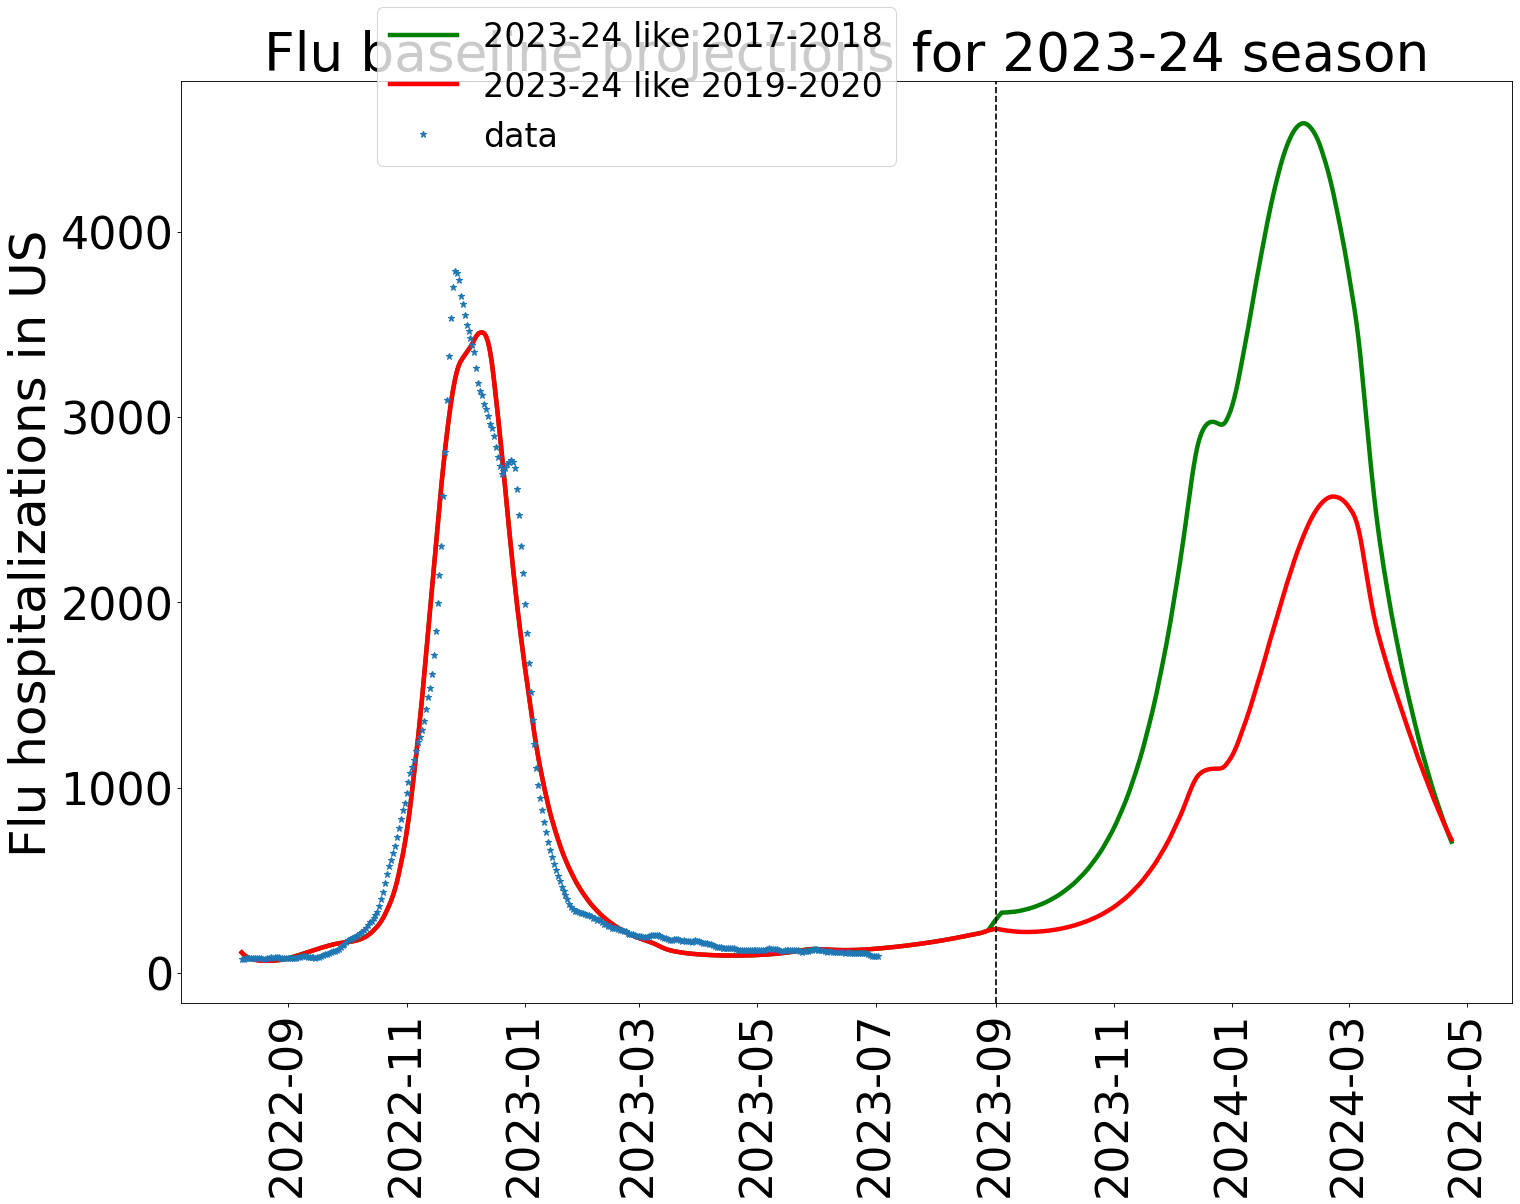

In [46]:
import matplotlib.dates as mdates  ### showinh only 4 flue scenarios 
drange1 = pd.date_range("2022-08-08", periods=625, freq="1D")
drange2 = pd.date_range("2022-08-08", periods=329, freq="1D")
drange3 = pd.date_range("2022-08-08", periods=390, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 40})
_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg, 'g', label = '2023-24 like 2017-2018', lw =4)
plt.plot(drange1, H_ov_avgb, 'r', label = '2023-24 like 2019-2020', lw =4)

plt.plot(drange2, hosp_avg, '*', label = 'data', lw =4)
end_fitting_period = max(drange3)
plt.axvline(end_fitting_period, color='black', linestyle='dashed')


#plt.axis([19100, 19185, 0, 0.2e6])
plt.ylabel('Flu hospitalizations in US', fontsize = 45)

legend = plt.legend(fontsize=30) 
legend.set_bbox_to_anchor((0.55, 0.89))
plt.title('Flu baseline projections for 2023-24 season')
plt.tight_layout()


In [48]:
sc1 = 'AB'           
sc2 = '17like'
I_ov_avgA, D_ov_avgA, H_ov_avgA, D2_ovaA, Mv_ovv19A, M_ovvA, M1_ovvA, Mv_ovvA, S_ovA, E_ovA, bita_sA, R_ovA, I_ovA, protA,H_ov_avg0A,H_ov_avg1A,H_ov_avg2A,H_ov_avg3A,H_ov_avg4A,H_ov_avg5A = simulation_st1(0)


In [49]:
sc1 = 'AB'           
sc2 = '19like'
I_ov_avgB, D_ov_avgB, H_ov_avgB, D2_ovaB, Mv_ovv19B, M_ovvB, M1_ovvB, Mv_ovvB, S_ovB, E_ovB, bita_sB, R_ovB, I_ovB, protB,H_ov_avg0B,H_ov_avg1B,H_ov_avg2B,H_ov_avg3B,H_ov_avg4B,H_ov_avg5B = simulation_st1(0)


In [50]:
sc1 = 'CD'           
sc2 = '17like'
I_ov_avgC, D_ov_avgC, H_ov_avgC, D2_ovaC, Mv_ovv19C, M_ovvC, M1_ovvC, Mv_ovvC, S_ovC, E_ovC, bita_sC, R_ovC, I_ovC, protC,H_ov_avg0C,H_ov_avg1C,H_ov_avg2C,H_ov_avg3C,H_ov_avg4C,H_ov_avg5C = simulation_st1(0)


In [51]:
sc1 = 'CD'           
sc2 = '19like'
I_ov_avgD, D_ov_avgD, H_ov_avgD, D2_ovaD, Mv_ovv19D, M_ovvD, M1_ovvD, Mv_ovvD, S_ovD, E_ovD, bita_sD, R_ovD, I_ovD, protD,H_ov_avg0D,H_ov_avg1D,H_ov_avg2D,H_ov_avg3D,H_ov_avg4D,H_ov_avg5D = simulation_st1(0)


In [52]:
sc1 = 'EF'           
sc2 = '17like'
I_ov_avgE, D_ov_avgE, H_ov_avgE, D2_ovaE, Mv_ovv19E, M_ovvE, M1_ovvE, Mv_ovvE, S_ovE, E_ovE, bita_sE, R_ovE, I_ovE, protE,H_ov_avg0E,H_ov_avg1E,H_ov_avg2E,H_ov_avg3E,H_ov_avg4E,H_ov_avg5E = simulation_st1(0)


In [53]:
sc1 = 'EF'           
sc2 = '19like'
I_ov_avgF, D_ov_avgF, H_ov_avgF, D2_ovaF, Mv_ovv19F, M_ovvF, M1_ovvF, Mv_ovvF, S_ovF, E_ovF, bita_sF, R_ovF, I_ovF, protF,H_ov_avg0F,H_ov_avg1F,H_ov_avg2F,H_ov_avg3F,H_ov_avg4F,H_ov_avg5F = simulation_st1(0)


In [56]:
def tau_cal(x):
    x=int(x)
    if (x>=0):
        tau_leap=int(np.random.poisson(x, 1))
    else:
        tau_leap=int(np.random.poisson(x*(-1), 1))*(-1)
    return tau_leap

In [126]:
zx*g_hosp

0.07002550937142923

In [57]:
def simulation_st(x, popt, sc1, sc2,seed_list):
    
    x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8],  popt[9]
    z0, z1, z2, z3, z4, z5, z6 =2.27197452e-14, 2.34936226e-01, 5.58514886e-01, 2.67183447e-01,3.46016911e-01, 4.65992519e-01, 5.78248839e-01
    
    Nd = 670
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    
    if (sc2 == "17like"):
        M3_0 = set_imm(0.05)
    if (sc2 == "19like"):
        M3_0 = set_imm(0.05)
    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000  #0.005
    
    #np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(6)]
    I_0 = [x1 for n in range(6)]
    H0 = [x3/6 for n in range(6)]
    
    w2 = np.log(2)/(18*30)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    g_E = 1/(2)
    g_Recovery = 1/4
    for tt in range(int(Nd/dt)):
        seed_index=int(seed_list[count])
        np.random.seed(seed_index)
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp            
        zx = 1
        yx=1
        IHR = [facc*0.25, facc*0.06,facc*0.017, facc*0.025, facc*0.07, facc*0.45]
        IRec = [1- facc*0.25, 1- facc*0.06, 1-facc*0.017, 1-facc*0.025, 1-facc*0.07, 1-facc*0.45]
        if (tt*dt  < 31):
            bita = zz2[count]*(x0 + (tt*dt)*(x01 - x0)/30)/N
            zx = z0 + (tt*dt)*(z1 - z0)/30
            
        if (tt*dt >= 31 and tt*dt < 61):
            bita = zz2[count]*(x01 + (tt*dt - 30)*(x02 - x01)/30)/N
            zx = z1 + (tt*dt-31)*(z2 - z1)/30


        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.000
            bita = zz2[count]*(x02 + (tt*dt - 60)*(x03 - x02)/30)/N            
            zx = z2 + (tt*dt-61)*(z3 - z2)/30
            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.000
            bita = zz2[count]*(x03 + (tt*dt - 90)*(x04 - x03)/30)/N
            zx = z3 + (tt*dt-61)*(z4 - z3)/30
            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.000
            bita = zz2[count]*zz2[count]*(x04 + (tt*dt - 120)*(x05 - x04)/30)/N
            zx = z4 + (tt*dt-61)*(z5 - z4)/30

            
        if (tt*dt >= 151 and tt*dt < 329):
            sigma = 0.000
            bita = zz2[count]*(x05 + (tt*dt - 150)*(x06 - x05)/178)/N
            zx = z5 + (tt*dt-61)*(z6 - z5)/30
        
        if (tt*dt >= 329 and tt*dt < 393):
            sigma = 0.00
            bita = zz2[count]*x06/N
            zx = z5 + (tt*dt-61)*(z6 - z5)/30
        
        if (tt*dt >=393):
            zx=(z0+z1+z2+z3+z4+z5+z6)/7
            bbbb=(np.sqrt(np.diag(pcov)/(N*N)))            
            std=((30/134)*bbbb[1]+(30/134)*bbbb[4]+(74/134)*bbbb[7])*3*N
            rnd=np.random.normal(0, std, 1)
            
            if (sc2 == "17like"):
                IHR = [facc*0.02, facc*0.02,facc*0.01, facc*0.04, facc*0.08, facc*0.7]
                IRec = [1- facc*0.02, 1- facc*0.02, 1-facc*0.01, 1-facc*0.04, 1-facc*0.08, 1-facc*0.7]
                yx = 1.05
                bita=zz2[count]*1.04*(x01+x03+x06+rnd)/(3*N)

                

            if (sc2 == "19like"):
                IHR = [facc*0.07, facc*0.04,facc*0.01, facc*0.07, facc*0.10, facc*0.40]
                IRec = [1- facc*0.07, 1- facc*0.04, 1-facc*0.01, 1-facc*0.07, 1-facc*0.10, 1-facc*0.40]
                bita=zz2[count]*1*(x01+x03+x06+rnd)/(3*N)

                yx = 0.9




            
        CM = CM_all
        if (count <= 800):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 
    
            
 
        for i in range(6):            
            if (count <393):
                prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
                prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 

                S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i]  + ww*R[i]) 
                E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  

                case_c_new[i] = case_c[i] + dt*(g_E*E[i])      
                I_new[i] = I[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E[i]  - g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i])
                hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i])

                H_new[i] = H[i] + dt*(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) 
                D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i])
                R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) 
            
            if (count >=393):
                seed_index=int(seed_list[count])
                np.random.seed(seed_index)
                prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
                prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
                
                S_new[i] = S[i] + tau_cal(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i]*dt)  + tau_cal(ww*R[i]*dt) 
                E_new[i] = E[i] + tau_cal((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i]*dt) - tau_cal(g_E*E[i]*dt)
                case_c_new[i] = case_c[i] + tau_cal(g_E*E[i]*dt)
                I_new[i] = I[i] + tau_cal(Seed[tt]*(data_dem[i]/N)*dt) + tau_cal(g_E*E[i]*dt)  - tau_cal(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i]*dt) - tau_cal(g_Recovery*IRec[i]*I[i]*dt) 
                hosp_c_new[i] = hosp_c[i] + tau_cal(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i]*dt)
                H_new[i] = H[i] + tau_cal(g_Recovery*(yx*IHR[i]/(1 + prot_hosp))*I[i]*dt)  - tau_cal(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i]*dt) - tau_cal(g_hosp*HDRec[i]*H[i]*dt) 
                D_new[i] = D[i] + tau_cal(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i]*dt)
                R_new[i] = R[i] + tau_cal( g_hosp*HDRec[i]*H[i]*dt) + tau_cal(g_Recovery*IRec[i]*I[i]*dt) - tau_cal(ww*R[i]*dt) 
                      
                

                     
            
            if (count <= 368):
                vacc_ref = vacc_28
            
            
            if (count > 368 and count <= 800):
                    
                if (sc1 == 'normal'):
                    vacc_ref = vacc_28
                    
                elif (sc1 == 'AB'):
                    vacc_ref = vacc_28*1.2
                    
                elif (sc1 == 'CD'):
                    vacc_ref = vacc_28
                    
                elif (sc1 == 'EF'):
                    vacc_ref = vacc_28*0.8
                   
                else:
                    vacc_ref = vacc_28
                    

            Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
            if (count > 393 and count <= 800):
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R[i]/(prot_inf))
                M_new[i] = M[i] + dt*(-w2*M[i] )
            if (count < 393):
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
            prot[count,i] = (1/(1+prot_inf))
            
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        if(tt % int(1/dt) == 0):
            
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
              
            bita_s[count] = bita    
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            


            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        

    peak_H = np.max(H_ov_avg)
    peak_D = np.max(H_ov_avg)
    
    for i in range(Nd-7):
        if (H_ov_avg[i] == peak_H):
            peak_d_H = i
            
        if (D_ov_avg[i] == peak_D):
            peak_d_D = i  
  

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5

In [58]:
from numpy import genfromtxt
seed_table= genfromtxt('seed.csv', delimiter=',')

In [59]:
def sim_scenario(scen):
    Nsim = 200
    if (scen == "A"):
        sc1 = 'AB'           
        sc2 = '17like'

    if (scen == "B"):
        sc1 = 'AB'           
        sc2 = '19like'
        
    if (scen == "C"):
        sc1 = 'CD'           
        sc2 = '17like'

    if (scen == "D"):
        sc1 = 'CD'           
        sc2 = '19like'
    
    if (scen == "E"):
        sc1 = 'EF'           
        sc2 = '17like'
        
    if (scen == "F"):
        sc1 = 'EF'           
        sc2 = '19like'


    print('fitting completed')         
    new_hosp = np.zeros([663, Nsim])
    new_death = np.zeros([663, Nsim])
    new_hosp_0 = np.zeros([663, Nsim])
    new_hosp_1 = np.zeros([663, Nsim])
    new_hosp_2 = np.zeros([663, Nsim])
    new_hosp_3 = np.zeros([663, Nsim])
    new_hosp_4 = np.zeros([663, Nsim])
    new_hosp_5 = np.zeros([663, Nsim])
    seed_list = np.zeros([800, 1])

    

    for i in range(Nsim):
        seed_list= seed_table[i,:]
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5= simulation_st(0, popt, sc1, sc2,seed_list)
        
        new_hosp[:,i] = H_ov_avg
        new_death[:,i] = D_ov_avg
        new_hosp_0[:,i] = H_ov_avg0
        new_hosp_1[:,i] = H_ov_avg1
        new_hosp_2[:,i] = H_ov_avg2
        new_hosp_3[:,i] = H_ov_avg3
        new_hosp_4[:,i] = H_ov_avg4
        new_hosp_5[:,i] = H_ov_avg5
        

    print("computing percentiles for, ", scen)
    new_hosp_p = np.zeros([663, 25])
    new_death_p = np.zeros([663, 25])
    new_hosp_p0 = np.zeros([663, 25])
    new_hosp_p1 = np.zeros([663, 25]) 
    new_hosp_p2 = np.zeros([663, 25])
    new_hosp_p3 = np.zeros([663, 25])
    new_hosp_p4 = np.zeros([663, 25])
    new_hosp_p5 = np.zeros([663, 25])
    
    

    for i in range(663):
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_death_p[i,:] = np.percentile(new_death[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p0[i,:] = np.percentile(new_hosp_0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p1[i,:] = np.percentile(new_hosp_1[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p2[i,:] = np.percentile(new_hosp_2[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p3[i,:] = np.percentile(new_hosp_3[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p4[i,:] = np.percentile(new_hosp_4[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p5[i,:] = np.percentile(new_hosp_5[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

    return new_hosp_p, new_death_p, new_hosp_p0, new_hosp_p1, new_hosp_p2, new_hosp_p3, new_hosp_p4, new_hosp_p5

In [60]:
xdata = np.linspace(0, 663, 663)
ydata = hosp_avg
new_hosp_p_A, new_death_p_A, new_hosp_p0_A, new_hosp_p1_A, new_hosp_p2_A, new_hosp_p3_A, new_hosp_p4_A, new_hosp_p5_A= sim_scenario('A')
new_hosp_p_B, new_death_p_B, new_hosp_p0_B, new_hosp_p1_B, new_hosp_p2_B, new_hosp_p3_B, new_hosp_p4_B, new_hosp_p5_B= sim_scenario('B')
new_hosp_p_C, new_death_p_C, new_hosp_p0_C, new_hosp_p1_C, new_hosp_p2_C, new_hosp_p3_C, new_hosp_p4_C, new_hosp_p5_C = sim_scenario('C')
new_hosp_p_D, new_death_p_D, new_hosp_p0_D, new_hosp_p1_D, new_hosp_p2_D, new_hosp_p3_D, new_hosp_p4_D, new_hosp_p5_D = sim_scenario('D')
new_hosp_p_E, new_death_p_E, new_hosp_p0_E, new_hosp_p1_E, new_hosp_p2_E, new_hosp_p3_E, new_hosp_p4_E, new_hosp_p5_E= sim_scenario('E')
new_hosp_p_F, new_death_p_F, new_hosp_p0_F, new_hosp_p1_F, new_hosp_p2_F, new_hosp_p3_F, new_hosp_p4_F, new_hosp_p5_F = sim_scenario('F')


fitting completed
computing percentiles for,  A
fitting completed
computing percentiles for,  B
fitting completed
computing percentiles for,  C
fitting completed
computing percentiles for,  D
fitting completed
computing percentiles for,  E
fitting completed
computing percentiles for,  F


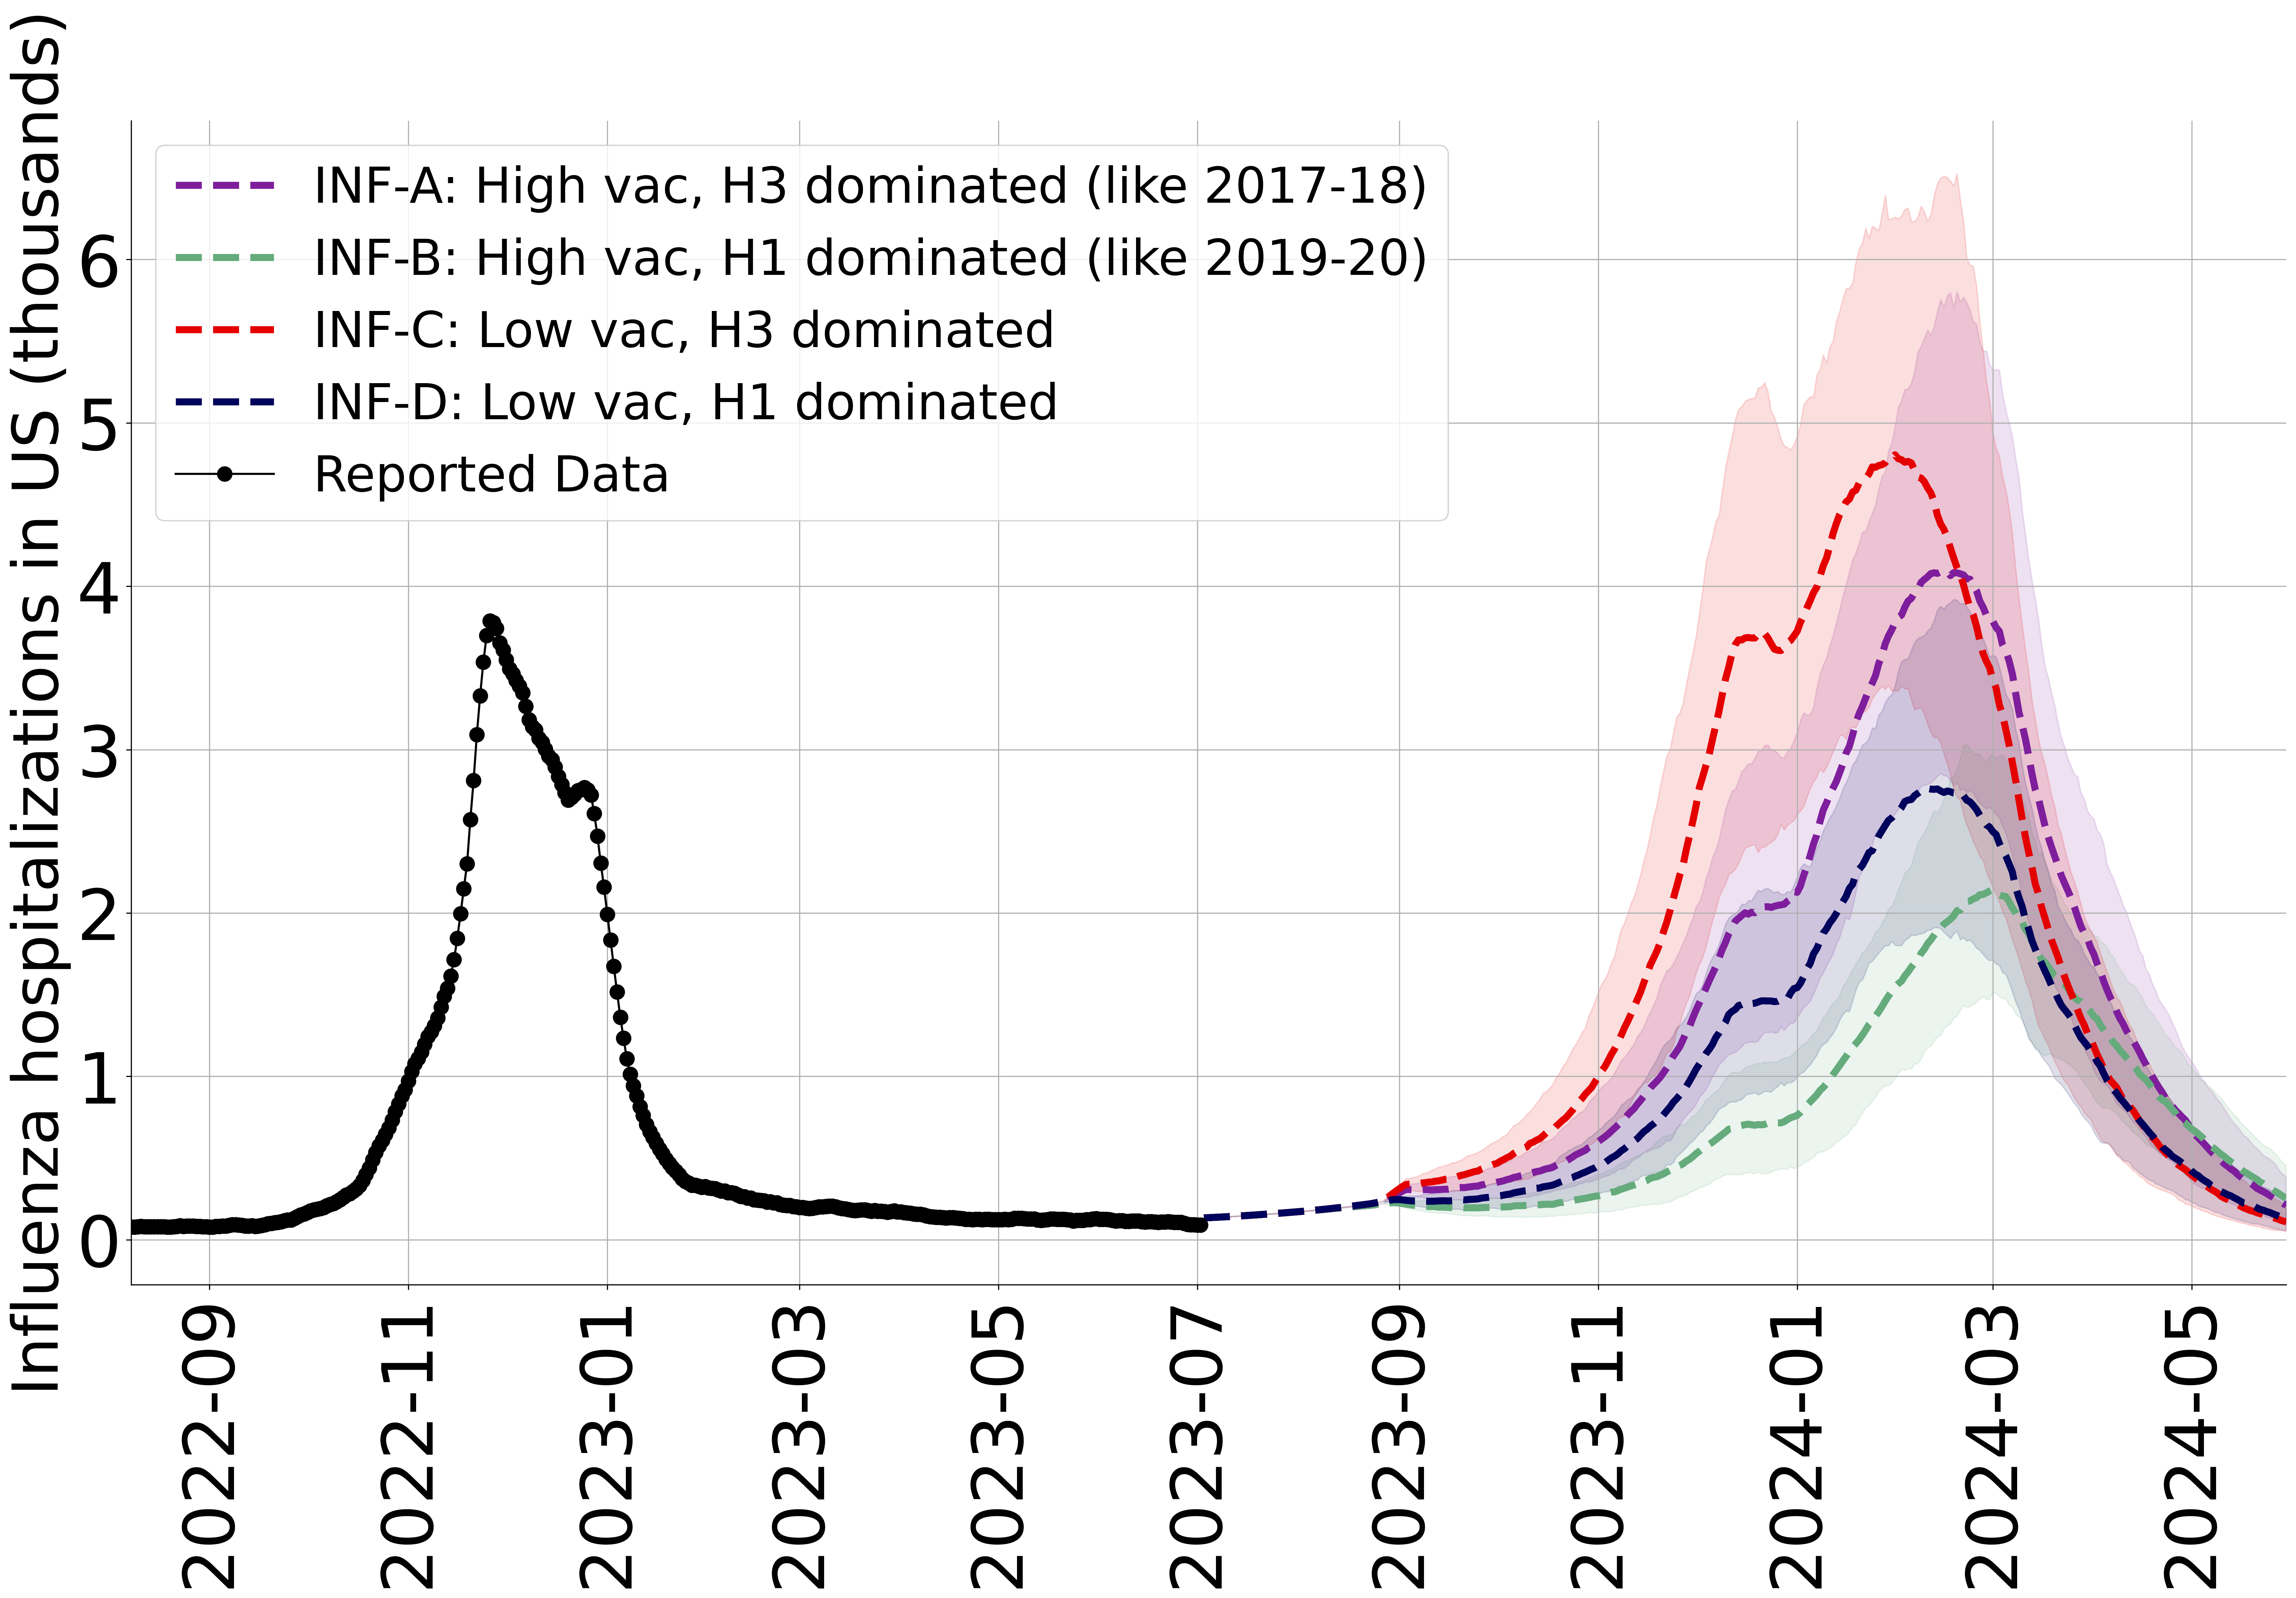

In [62]:
drange1 = pd.date_range("2023-07-03", periods=333, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=329, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})


plt.fill_between(drange1, new_hosp_p_A[330:663,2]/1000, new_hosp_p_A[330:663,21]/1000, color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[330:663,12]/1000, '--', color='xkcd:purple', lw=5, label = 'INF-A: High vac, H3 dominated (like 2017-18)')

plt.fill_between(drange1, new_hosp_p_B[330:663,2]/1000, new_hosp_p_B[330:663,21]/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[330:663,12]/1000, '--', color='xkcd:tea', lw=5, label = 'INF-B: High vac, H1 dominated (like 2019-20)')


plt.fill_between(drange1, new_hosp_p_E[330:663,2]/1000, new_hosp_p_E[330:663,21]/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[330:663,12]/1000, '--', color='xkcd:red', lw=5, label = 'INF-C: Low vac, H3 dominated')

plt.fill_between(drange1, new_hosp_p_F[330:663,2]/1000, new_hosp_p_F[330:663,21]/1000, color='xkcd:dark blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[330:663,12]/1000, '--', color='xkcd:dark blue', lw=5, label = 'INF-D: Low vac, H1 dominated')

plt.plot(drange2, hosp_avg/1000, 'k-o', markersize=10, label = 'Reported Data')


plt.xticks(rotation=90)
#plt.title(' Tau leaping & parameter uncertainty')
plt.ylabel('Influenza hospitalizations in US (thousands)', fontsize = 45)
plt.legend(fontsize=35,loc='upper left')
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

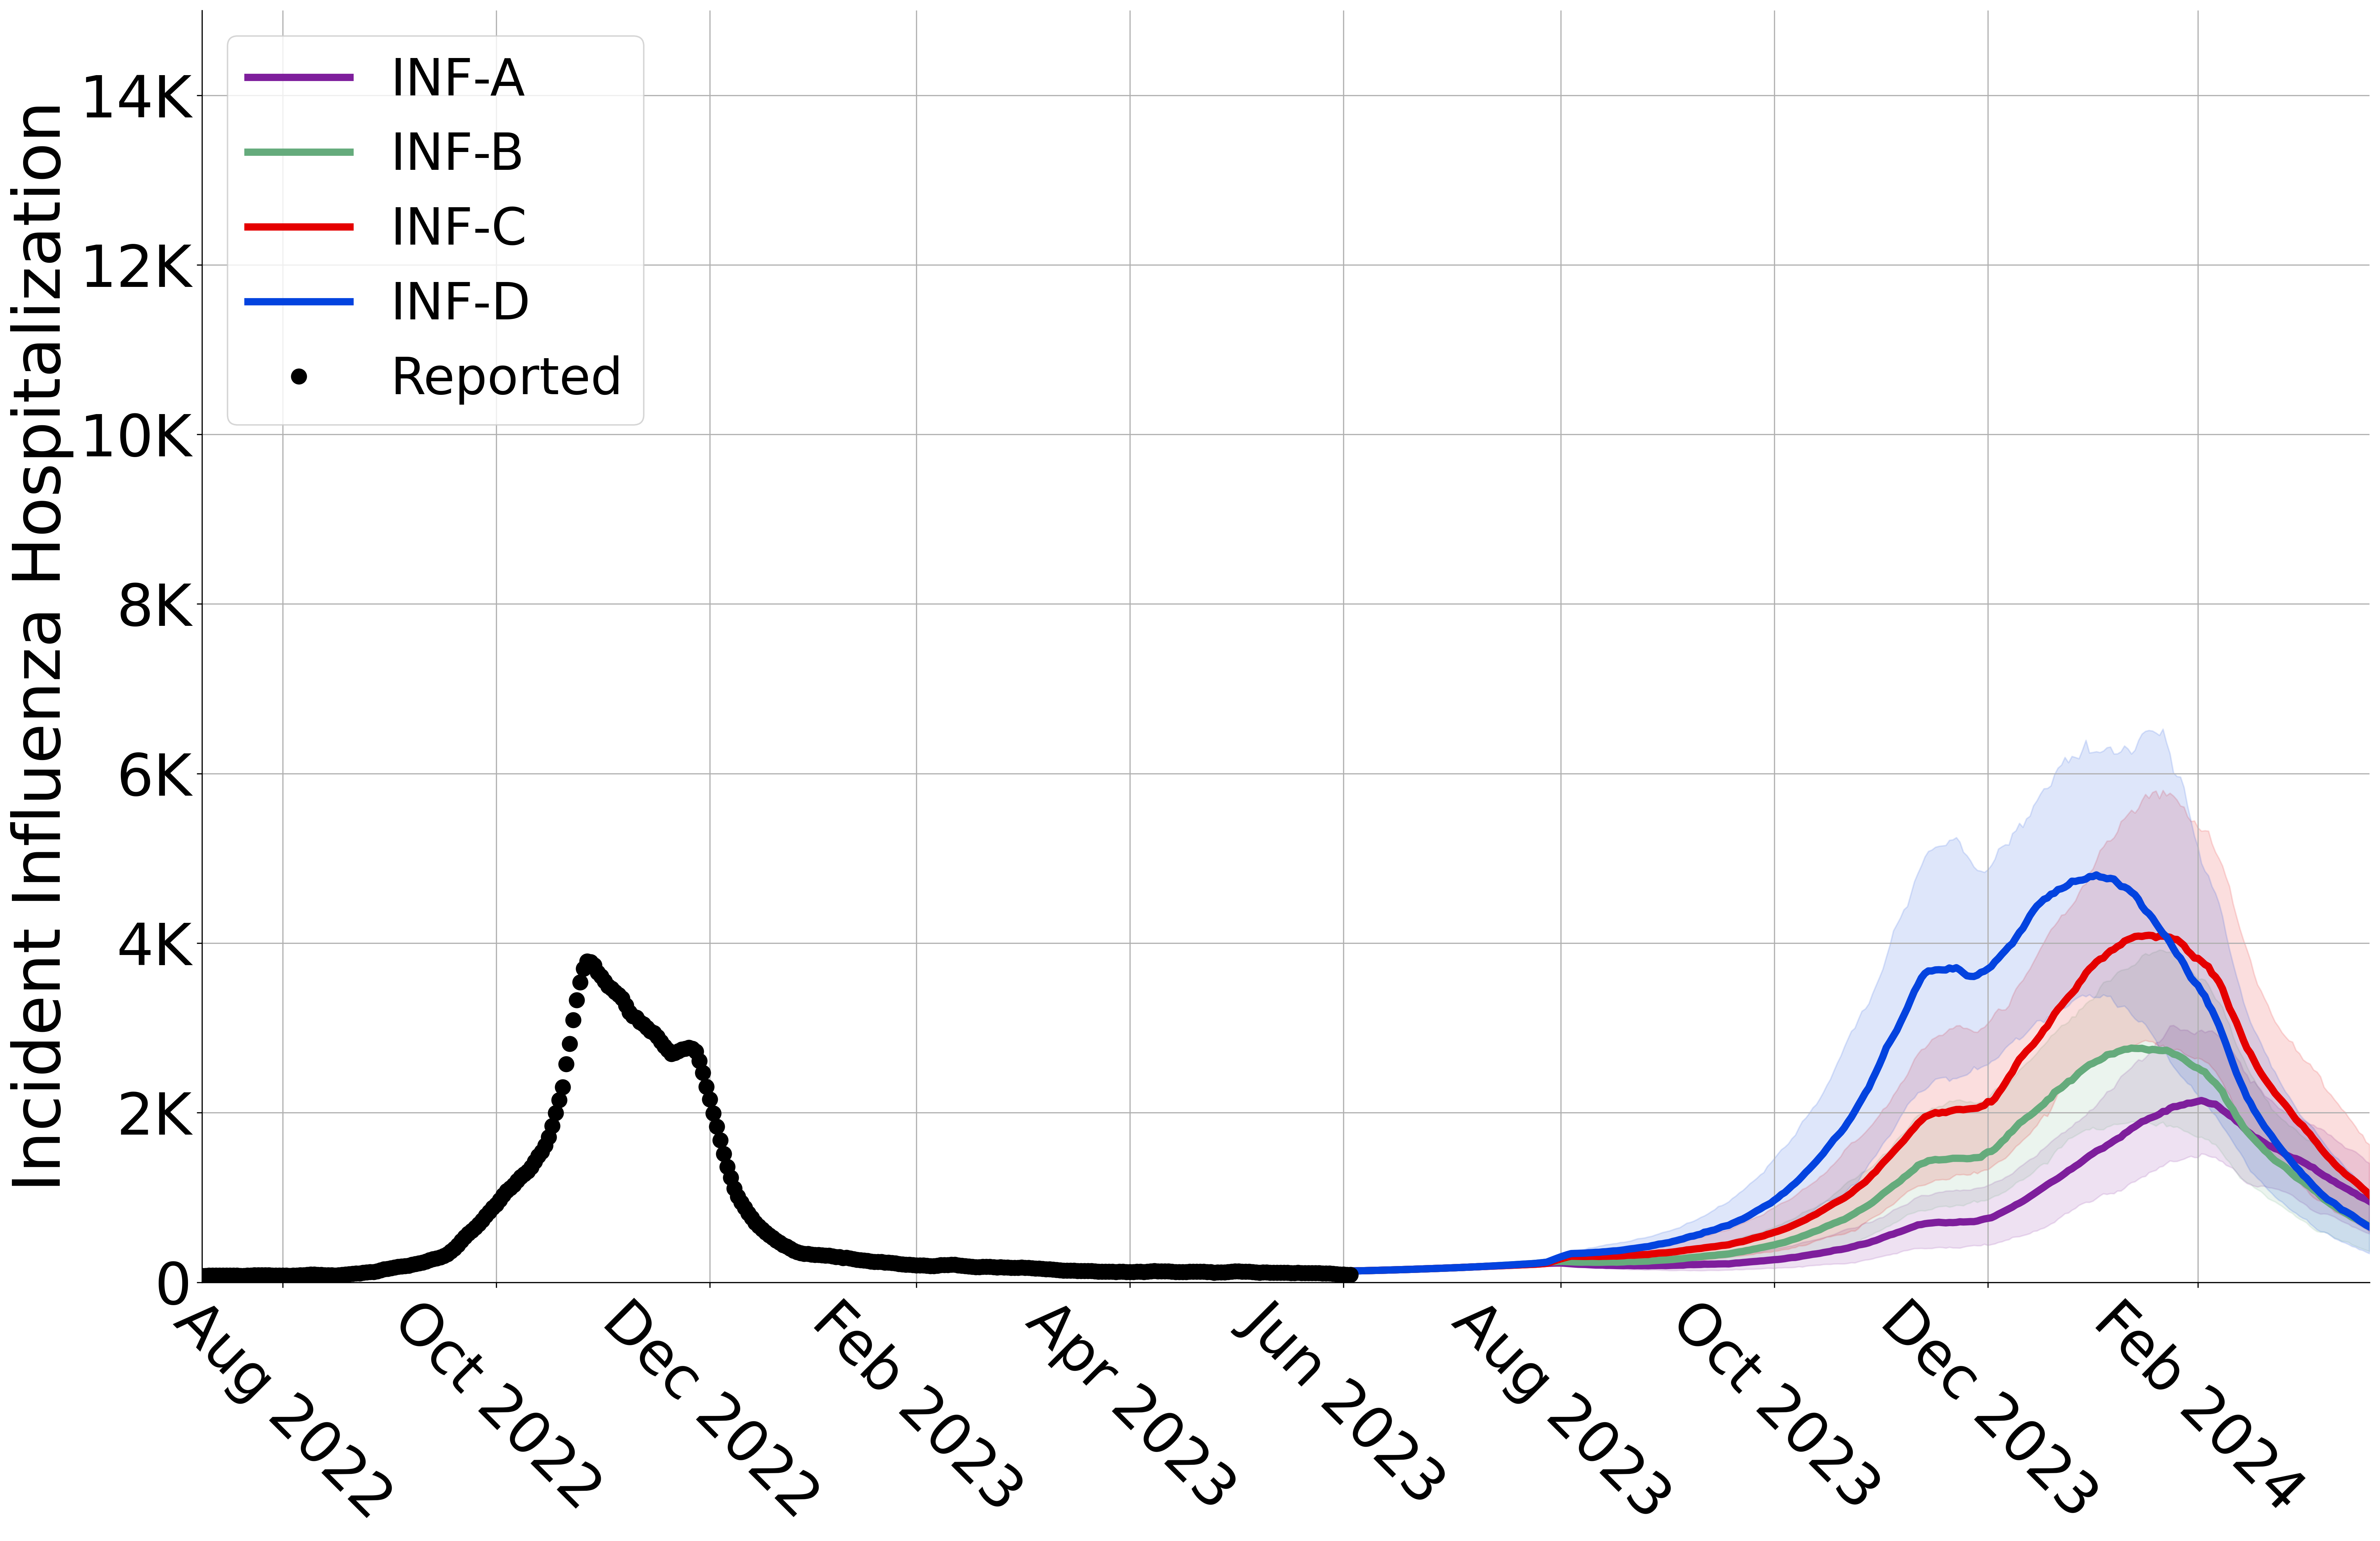

In [80]:
from matplotlib.lines import Line2D
drange1 = pd.date_range("2023-07-03", periods=291, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=329, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})


plt.fill_between(drange1, new_hosp_p_B[330:621,2]/1000, new_hosp_p_B[330:621,21]/1000, color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[330:621,12]/1000, '-', color='xkcd:purple', lw=5, label = 'INF-A')

plt.fill_between(drange1, new_hosp_p_F[330:621,2]/1000, new_hosp_p_F[330:621,21]/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[330:621,12]/1000, '-', color='xkcd:tea', lw=5, label = 'INF-B')

plt.fill_between(drange1, new_hosp_p_A[330:621,2]/1000, new_hosp_p_A[330:621,21]/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[330:621,12]/1000, '-', color='xkcd:red', lw=5, label = 'INF-C')

plt.fill_between(drange1, new_hosp_p_E[330:621,2]/1000, new_hosp_p_E[330:621,21]/1000, color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[330:621,12]/1000, '-', color='xkcd:blue', lw=5, label = 'INF-D')



plt.plot(drange2, hosp_avg/1000, 'ko', markersize=10, label = 'Reported')

x_ticks = pd.date_range(start="2022-08-08", end="2024-05-03", freq='2M')  # 2-month frequency
x_tick_labels = [x.strftime("%b %Y") for x in x_ticks]

legend_lines = [Line2D([0], [0], color='xkcd:purple', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:tea', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:red', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:blue', linestyle='-', lw=5),
                Line2D([0], [0], marker='o', markersize=10, color='black',linestyle='-', lw=0)]

plt.xticks(x_ticks, x_tick_labels, rotation = -45, fontsize=40)
#plt.plot(drange1, hosp_avg, 'k-o', markersize=14)

plt.ylim(0, 15)
plt.ylabel('Incident Influenza Hospitalization', fontsize = 45)
#plt.title(' Tau leaping & parameter uncertainty')

plt.autoscale(enable=True, axis='x', tight=True) 
plt.legend(handles=legend_lines,labels=['INF-A','INF-B', 'INF-C', 'INF-D','Reported'], fontsize=35, loc='upper left')
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], ["0",  "2K", "4K", "6K", "8K", "10K", "12K", "14K"],fontsize=40)
plt.tight_layout()

In [67]:
import datetime
def calcul_peak_date(case,lenth,start_t,end_t):
    peaks = np.zeros([lenth,])
    peak_d = np.zeros([lenth,])
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0)
    
    for j in range(lenth):
        peaks[j] = np.max(case[start_t:end_t,j])
        
        for i in range(start_t,end_t):
            if (case[i,j] >= peaks[j]):
                peak_d[j] = i
                
    
    peak_d_p = np.percentile(peak_d, [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    print(peak_d_p[12])
    
    my_date_50 = my_date + datetime.timedelta(days = peak_d_p[12])
    my_date_50 = my_date_50.strftime('%m/%d')
    
    my_date_5 = my_date + datetime.timedelta(days = peak_d_p[2])
    my_date_5 = my_date_5.strftime('%m/%d')  
    
    my_date_95 = my_date + datetime.timedelta(days = peak_d_p[22])
    my_date_95 = my_date_95.strftime('%m/%d')      
    
    print(str((my_date_50)) + " [" + str((my_date_5)) + ", " + str((my_date_95)) + "]")

In [68]:
calcul_peak_date(new_hosp_p_B,25,330,621)

573.0
03/03 [02/26, 03/05]


In [69]:
calcul_peak_date(new_hosp_p_F,25,330,621)

554.0
02/13 [02/09, 02/24]


In [70]:
calcul_peak_date(new_hosp_p_A,25,330,621)

557.0
02/16 [02/11, 02/24]


In [71]:
calcul_peak_date(new_hosp_p_E,25,330,621)

541.0
01/31 [01/23, 02/14]


In [174]:
import datetime
import pandas as pd

# Define H_ov_avg_a, H_ov_avg_b, H_ov_avg_c, H_ov_avg_d before using them

start_date = datetime.date(2022, 8, 8)
delta = datetime.timedelta(days=1)
FL_D = pd.DataFrame(columns=['date_count', 'FLU_scenario_A','FLU_scenario_A04','FLU_scenario_A511','FLU_scenario_A1218','FLU_scenario_A1949','FLU_scenario_A5064','FLU_scenario_A65',
                             'FLU_scenario_A5','FLU_scenario_A5_04','FLU_scenario_A5_511','FLU_scenario_A5_1218','FLU_scenario_A5_1949','FLU_scenario_A5_5064','FLU_scenario_A5_65',
                             'FLU_scenario_A95','FLU_scenario_A95_04','FLU_scenario_A95_511','FLU_scenario_A95_1218','FLU_scenario_A95_1949','FLU_scenario_A95_5064','FLU_scenario_A95_65',
                             
                             'FLU_scenario_B','FLU_scenario_B04','FLU_scenario_B511','FLU_scenario_B1218','FLU_scenario_B1949','FLU_scenario_B5064','FLU_scenario_B65',
                             'FLU_scenario_B5','FLU_scenario_B5_04','FLU_scenario_B5_511','FLU_scenario_B5_1218','FLU_scenario_B5_1949','FLU_scenario_B5_5064','FLU_scenario_B5_65',
                             'FLU_scenario_B95','FLU_scenario_B95_04','FLU_scenario_B95_511','FLU_scenario_B95_1218','FLU_scenario_B95_1949','FLU_scenario_B95_5064','FLU_scenario_B95_65',
                             
                             'FLU_scenario_C','FLU_scenario_C04','FLU_scenario_C511','FLU_scenario_C1218','FLU_scenario_C1949','FLU_scenario_C5064','FLU_scenario_C65',
                             'FLU_scenario_C5','FLU_scenario_C5_04','FLU_scenario_C5_511','FLU_scenario_C5_1218','FLU_scenario_C5_1949','FLU_scenario_C5_5064','FLU_scenario_C5_65',
                             'FLU_scenario_C95','FLU_scenario_C95_04','FLU_scenario_C95_511','FLU_scenario_C95_1218','FLU_scenario_C95_1949','FLU_scenario_C95_5064','FLU_scenario_C95_65',
                             
                             'FLU_scenario_D','FLU_scenario_D04','FLU_scenario_D511','FLU_scenario_D1218','FLU_scenario_D1949','FLU_scenario_D5064','FLU_scenario_D65',
                             'FLU_scenario_D5','FLU_scenario_D5_04','FLU_scenario_D5_511','FLU_scenario_D5_1218','FLU_scenario_D5_1949','FLU_scenario_D5_5064','FLU_scenario_D5_65',
                             'FLU_scenario_D95','FLU_scenario_D95_04','FLU_scenario_D95_511','FLU_scenario_D95_1218','FLU_scenario_D95_1949','FLU_scenario_D95_5064','FLU_scenario_D95_65'])

for i in range(663):
    start_date += delta
    date = start_date
    SA = new_hosp_p_A[i,12]
    SA_04=new_hosp_p0_A[i,12]
    SA_511=new_hosp_p1_A[i,12]
    SA_1218=new_hosp_p2_A[i,12]
    SA_1949=new_hosp_p3_A[i,12]
    SA_5064=new_hosp_p4_A[i,12]
    SA_65=new_hosp_p5_A[i,12]
    
    SA5 = new_hosp_p_A[i,2]
    SA5_04 = new_hosp_p0_A[i,2]
    SA5_511 = new_hosp_p1_A[i,2]
    SA5_1218 = new_hosp_p2_A[i,2]
    SA5_1949 = new_hosp_p3_A[i,2]
    SA5_5064 = new_hosp_p4_A[i,2]
    SA5_65 = new_hosp_p5_A[i,2]
    
    SA95 = new_hosp_p_A[i,21]
    SA95_04 = new_hosp_p0_A[i,21]
    SA95_511 = new_hosp_p1_A[i,21]
    SA95_1218 = new_hosp_p2_A[i,21]
    SA95_1949 = new_hosp_p3_A[i,21]
    SA95_5064 = new_hosp_p4_A[i,21]
    SA95_65 = new_hosp_p5_A[i,21]
    
    SB = new_hosp_p_B[i,12]
    SB_04=new_hosp_p0_B[i,12]
    SB_511=new_hosp_p1_B[i,12]
    SB_1218=new_hosp_p2_B[i,12]
    SB_1949=new_hosp_p3_B[i,12]
    SB_5064=new_hosp_p4_B[i,12]
    SB_65=new_hosp_p5_B[i,12]
    
    SB5 = new_hosp_p_B[i,2]
    SB5_04 = new_hosp_p0_B[i,2]
    SB5_511 = new_hosp_p1_B[i,2]
    SB5_1218 = new_hosp_p2_B[i,2]
    SB5_1949 = new_hosp_p3_B[i,2]
    SB5_5064 = new_hosp_p4_B[i,2]
    SB5_65 = new_hosp_p5_B[i,2]
    
    SB95 = new_hosp_p_B[i,21]
    SB95_04 = new_hosp_p0_B[i,21]
    SB95_511 = new_hosp_p1_B[i,21]
    SB95_1218 = new_hosp_p2_B[i,21]
    SB95_1949 = new_hosp_p3_B[i,21]
    SB95_5064 = new_hosp_p4_B[i,21]
    SB95_65 = new_hosp_p5_B[i,21]
    
    SC = new_hosp_p_E[i,12]
    SC_04=new_hosp_p0_E[i,12]
    SC_511=new_hosp_p1_E[i,12]
    SC_1218=new_hosp_p2_E[i,12]
    SC_1949=new_hosp_p3_E[i,12]
    SC_5064=new_hosp_p4_E[i,12]
    SC_65=new_hosp_p5_E[i,12]
    
    SC5 = new_hosp_p_E[i,2]
    SC5_04 = new_hosp_p0_E[i,2]
    SC5_511 = new_hosp_p1_E[i,2]
    SC5_1218 = new_hosp_p2_E[i,2]
    SC5_1949 = new_hosp_p3_E[i,2]
    SC5_5064 = new_hosp_p4_E[i,2]
    SC5_65 = new_hosp_p5_E[i,2]
    
    SC95 = new_hosp_p_E[i,21]
    SC95_04 = new_hosp_p0_E[i,21]
    SC95_511 = new_hosp_p1_E[i,21]
    SC95_1218 = new_hosp_p2_E[i,21]
    SC95_1949 = new_hosp_p3_E[i,21]
    SC95_5064 = new_hosp_p4_E[i,21]
    SC95_65 = new_hosp_p5_E[i,21]
    
    SD = new_hosp_p_F[i,12]
    SD_04=new_hosp_p0_F[i,12]
    SD_511=new_hosp_p1_F[i,12]
    SD_1218=new_hosp_p2_F[i,12]
    SD_1949=new_hosp_p3_F[i,12]
    SD_5064=new_hosp_p4_F[i,12]
    SD_65=new_hosp_p5_F[i,12]
    
    SD5 = new_hosp_p_F[i,2]
    SD5_04 = new_hosp_p0_F[i,2]
    SD5_511 = new_hosp_p1_F[i,2]
    SD5_1218 = new_hosp_p2_F[i,2]
    SD5_1949 = new_hosp_p3_F[i,2]
    SD5_5064 = new_hosp_p4_F[i,2]
    SD5_65 = new_hosp_p5_F[i,2]
    
    SD95 = new_hosp_p_F[i,21]
    SD95_04 = new_hosp_p0_F[i,21]
    SD95_511 = new_hosp_p1_F[i,21]
    SD95_1218 = new_hosp_p2_F[i,21]
    SD95_1949 = new_hosp_p3_F[i,21]
    SD95_5064 = new_hosp_p4_F[i,21]
    SD95_65 = new_hosp_p5_F[i,21]
    
    FL_D = FL_D.append({'date_count': start_date,'FLU_scenario_A':SA,'FLU_scenario_A04':SA_04,'FLU_scenario_A511':SA_511,'FLU_scenario_A1218':SA_1218,'FLU_scenario_A1949':SA_1949,'FLU_scenario_A5064':SA_5064,'FLU_scenario_A65':SA_65,                       
                        'FLU_scenario_A5':SA5,'FLU_scenario_A5_04':SA5_04,'FLU_scenario_A5_511':SA5_511,'FLU_scenario_A5_1218':SA5_1218,'FLU_scenario_A5_1949':SA5_1949,'FLU_scenario_A5_5064':SA5_5064,'FLU_scenario_A5_65':SA5_65,
                        'FLU_scenario_A95':SA95,'FLU_scenario_A95_04':SA95_04,'FLU_scenario_A95_511':SA95_511,'FLU_scenario_A95_1218':SA95_1218,'FLU_scenario_A95_1949':SA95_1949,'FLU_scenario_A95_5064':SA95_5064,'FLU_scenario_A95_65':SA95_65,
                        'FLU_scenario_B':SB,'FLU_scenario_B04':SB_04,'FLU_scenario_B511':SB_511,'FLU_scenario_B1218':SB_1218,'FLU_scenario_B1949':SB_1949,'FLU_scenario_B5064':SB_5064,'FLU_scenario_B65':SB_65,                        
                        'FLU_scenario_B5':SB5,'FLU_scenario_B5_04':SB5_04,'FLU_scenario_B5_511':SB5_511,'FLU_scenario_B5_1218':SB5_1218,'FLU_scenario_B5_1949':SB5_1949,'FLU_scenario_B5_5064':SB5_5064,'FLU_scenario_B5_65':SB5_65,
                        'FLU_scenario_B95':SB95,'FLU_scenario_B95_04':SB95_04,'FLU_scenario_B95_511':SB95_511,'FLU_scenario_B95_1218':SB95_1218,'FLU_scenario_B95_1949':SB95_1949,'FLU_scenario_B95_5064':SB95_5064,'FLU_scenario_B95_65':SB95_65,
                        'FLU_scenario_C':SC,'FLU_scenario_C04':SC_04,'FLU_scenario_C511':SC_511,'FLU_scenario_C1218':SC_1218,'FLU_scenario_C1949':SC_1949,'FLU_scenario_C5064':SC_5064,'FLU_scenario_C65':SC_65, 
                        'FLU_scenario_C5':SC5,'FLU_scenario_C5_04':SC5_04,'FLU_scenario_C5_511':SC5_511,'FLU_scenario_C5_1218':SC5_1218,'FLU_scenario_C5_1949':SC5_1949,'FLU_scenario_C5_5064':SC5_5064,'FLU_scenario_C5_65':SC5_65,
                        'FLU_scenario_C95':SC95, 'FLU_scenario_C95_04':SC95_04,'FLU_scenario_C95_511':SC95_511,'FLU_scenario_C95_1218':SC95_1218,'FLU_scenario_C95_1949':SC95_1949,'FLU_scenario_C95_5064':SC95_5064,'FLU_scenario_C95_65':SC95_65,
                        'FLU_scenario_D':SD,'FLU_scenario_D04':SD_04,'FLU_scenario_D511':SD_511,'FLU_scenario_D1218':SD_1218,'FLU_scenario_D1949':SD_1949,'FLU_scenario_D5064':SD_5064,'FLU_scenario_D65':SD_65, 
                        'FLU_scenario_D5':SD5,'FLU_scenario_D5_04':SD5_04,'FLU_scenario_D5_511':SD5_511,'FLU_scenario_D5_1218':SD5_1218,'FLU_scenario_D5_1949':SD5_1949,'FLU_scenario_D5_5064':SD5_5064,'FLU_scenario_D5_65':SD5_65,
                        'FLU_scenario_D95':SD95,'FLU_scenario_D95_04':SD95_04,'FLU_scenario_D95_511':SD95_511,'FLU_scenario_D95_1218':SD95_1218,'FLU_scenario_D95_1949':SD95_1949,'FLU_scenario_D95_5064':SD95_5064,'FLU_scenario_D95_65':SD95_65,}, ignore_index=True)
FL_D  

,date_count,FLU_scenario_A,FLU_scenario_A04,FLU_scenario_A511,FLU_scenario_A1218,FLU_scenario_A1949,FLU_scenario_A5064,FLU_scenario_A65,FLU_scenario_A5,FLU_scenario_A5_04,...,FLU_scenario_D5_1949,FLU_scenario_D5_5064,FLU_scenario_D5_65,FLU_scenario_D95,FLU_scenario_D95_04,FLU_scenario_D95_511,FLU_scenario_D95_1218,FLU_scenario_D95_1949,FLU_scenario_D95_5064,FLU_scenario_D95_65
0,2022-08-09,110.711732,16.048160,5.889758,1.594280,10.656620,13.876628,62.646286,110.711732,16.048160,...,10.656620,13.876628,62.646286,110.711732,16.048160,5.889758,1.594280,10.656620,13.876628,62.646286
1,2022-08-10,99.934924,13.400063,5.231525,1.365586,11.203073,13.389343,55.345335,99.934924,13.400063,...,11.203073,13.389343,55.345335,99.934924,13.400063,5.231525,1.365586,11.203073,13.389343,55.345335
2,2022-08-11,91.579041,11.347252,4.690759,1.182678,11.648329,13.022332,49.687691,91.579041,11.347252,...,11.648329,13.022332,49.687691,91.579041,11.347252,4.690759,1.182678,11.648329,13.022332,49.687691
3,2022-08-12,85.048009,9.747080,4.241515,1.035447,12.016339,12.743841,45.263786,85.048009,9.747080,...,12.016339,12.743841,45.263786,85.048009,9.747080,4.241515,1.035447,12.016339,12.743841,45.263786
4,2022-08-13,79.934016,8.496117,3.866849,0.916638,12.328246,12.535912,41.790254,79.934016,8.496117,...,12.328246,12.535912,41.790254,79.934016,8.496117,3.866849,0.916638,12.328246,12.535912,41.790254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,2024-05-28,259.285714,1.571429,2.428571,0.714286,30.642857,35.428571,186.285714,125.103571,0.278571,...,18.553571,14.428571,33.975000,295.100000,9.300000,8.000000,1.428571,74.578571,61.350000,139.742857
659,2024-05-29,246.571429,1.500000,2.285714,0.571429,29.071429,33.928571,179.857143,113.964286,0.278571,...,16.700000,13.560714,33.792857,278.200000,9.007143,7.164286,1.285714,70.628571,58.450000,132.414286
660,2024-05-30,235.000000,1.428571,2.142857,0.571429,27.428571,32.214286,171.500000,108.142857,0.139286,...,15.978571,12.989286,32.092857,259.807143,8.285714,6.578571,1.142857,66.921429,55.300000,124.178571
661,2024-05-31,222.000000,1.285714,1.857143,0.285714,26.000000,29.928571,163.714286,99.967857,0.000000,...,14.707143,12.535714,29.835714,249.364286,7.721429,6.292857,1.000000,64.028571,51.878571,120.157143


In [175]:
FL_D.to_csv('Flu_rsv_final_results.csv')